In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_path = '/content/drive/My Drive/data/seg_train/'
test_path = '/content/drive/My Drive/data/seg_test/'

batch_size = 32
img_height = 224
img_width = 224

In [ ]:
#image_dataset_from_directory

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_path,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

class_names = train_ds.class_names

Found 3000 files belonging to 6 classes.
Found 600 files belonging to 6 classes.


In [4]:
#flow_from_directory

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator_simple = train_datagen.flow_from_directory(
        train_path,
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator_simple = test_datagen.flow_from_directory(
        test_path,
        target_size=(224, 224),    
        batch_size=32,
        class_mode='categorical')

Found 3000 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [5]:
#ImageDataGenerator, 이미지 변환

train_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(train_path,
                                                    batch_size=32,
                                                    class_mode='categorical',
                                                    target_size=(224, 224))


validation_datagen = ImageDataGenerator(rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_generator = validation_datagen.flow_from_directory(test_path,
                                                              batch_size=32,
                                                              class_mode='categorical',
                                                              target_size=(224, 224))

Found 3000 images belonging to 6 classes.
Found 600 images belonging to 6 classes.


In [ ]:
#batch_size, 이미지를 32개씩 묶음
#batch_size, defalut=32

print(train_generator[0][0].shape)
print(train_generator[1][0].shape)
print(train_generator[93][0].shape)

print(len(train_generator))
print(94 * 32)

print(train_generator[0][0][0].shape)

(32, 224, 224, 3)
(32, 224, 224, 3)
(24, 224, 224, 3)
94
3008
(224, 224, 3)


In [9]:
#image_dataset_from_directory
#train_ds.take(1) 활용


#flow_from_directory
image, label = train_generator[0]
print('image_shape:', image.shape)
print('label_shape:', label.shape)

image_shape: (32, 224, 224, 3)
label_shape: (32, 6)


####original####
(32, 224, 224, 3) (32, 6)


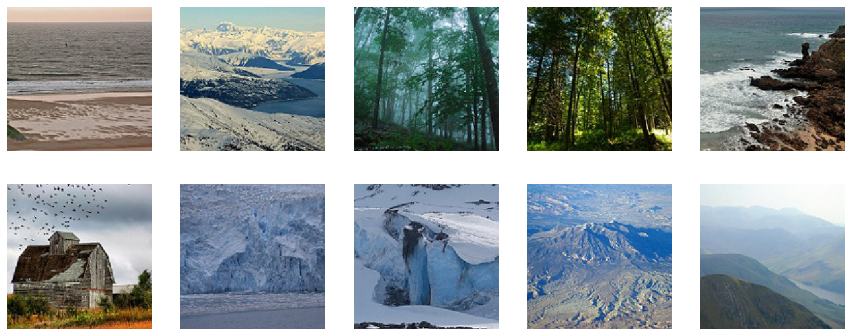

####generator####
(32, 224, 224, 3) (32, 6)


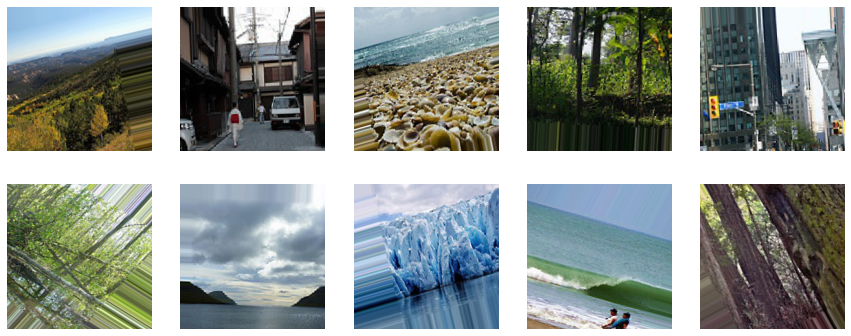

In [8]:
print('####original####')
for x, y in train_generator_simple:
    print(x.shape, y.shape)
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].axis('off')
    plt.show()
    break

print('####generator####')
for x, y in train_generator:
    print(x.shape, y.shape)
    
    fig, axes = plt.subplots(2, 5)
    fig.set_size_inches(15, 6)
    for i in range(10):
        axes[i//5, i%5].imshow(x[i])
        axes[i//5, i%5].axis('off')
    
    plt.show()
    break